In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM
import minimizer
%load_ext autoreload

In [2]:
%autoreload

# Example 1

## Generate data

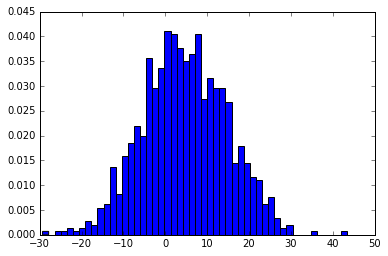

In [2]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [3]:
a = RTBM(1,1)
#a.random_init()

In [4]:
minim = minimizer.CMA(multi_thread=False)

CMA on 1 cpu(s) enabled


In [5]:
solution = minim.train(a, data, initial_solution=a.get_params())

../rtbm.py:173: RuntimeWarning: overflow encountered in exp
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:173: RuntimeWarning: invalid value encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../minimizer.py:27: RuntimeWarning: divide by zero encountered in log
  res = -np.sum(np.log(func(self._data)))
../rtbm.py:176: RuntimeWarning: invalid value encountered in multiply
  return np.sqrt(detT / (2.0 * np.pi) ** (v.shape[0])) * ExpF * R1/R2


(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=780797, Wed Oct 11 19:13:55 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
WARNING (module=cma.utilities.utils, iteration=1):  flat fitness (sigma=9.09e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
    1      8 inf 1.0e+00 9.09e-01  9e-01  1e+00 0:00.2


/usr/lib/sagemath/local/lib/python2.7/site-packages/cma/evolution_strategy.py:1628: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x0 = array(x0, dtype=float, copy=True)  # should not have column or row, is just 1-D
/usr/lib/sagemath/local/lib/python2.7/site-packages/cma/evolution_strategy.py:4336: ComplexWarning: Casting complex values to real discards the imaginary part
  + '\n')
/usr/lib/sagemath/local/lib/python2.7/site-packages/cma/evolution_strategy.py:3195: RuntimeWarning: invalid value encountered in cdouble_scalars
  es.fit.fit[-1] - es.fit.fit[0] < opts['tolfun'] and
/usr/lib/sagemath/local/lib/python2.7/site-packages/cma/evolution_strategy.py:3049: ComplexWarning: Casting complex values to real discards the imaginary part
  '%.15e' % (min(self.fit.fit)),


WARNING (module=cma.utilities.utils, iteration=1):  flat fitness (sigma=9.09e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.


../rtbm.py:173: RuntimeWarning: overflow encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)


    2     16 1.996703563326818e+04 1.4e+00 1.07e+00  9e-01  1e+00 0:00.3
    3     24 1.716918046826185e+04 1.8e+00 9.99e-01  8e-01  1e+00 0:00.5


/usr/lib/sagemath/local/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in cdouble_scalars
  ret = ret.dtype.type(ret / rcount)


   25    200 4.324003367146327e+03 3.6e+00 3.58e-01  2e-01  4e-01 0:03.6
   54    432 4.949545797258683e+03 7.4e+00 1.60e-01  5e-02  1e-01 0:07.6
   91    728 3.732783766926687e+03 1.9e+01 6.71e-02  5e-03  5e-02 0:12.6
  100    800 3.726342024287925e+03 3.2e+01 2.31e-02  1e-03  2e-02 0:13.9
  149   1192 3.726288021306099e+03 5.2e+02 3.38e-03  1e-05  4e-03 0:20.9
  200   1600 3.726259848555937e+03 1.8e+03 3.93e-02  7e-05  6e-02 0:28.2
  268   2144 3.726244972174929e+03 3.8e+04 1.10e-01  6e-05  4e-01 0:37.2
  300   2400 3.726241092225443e+03 2.7e+04 1.93e-01  3e-05  2e-01 0:41.2
  390   3120 3.726240483328276e+03 1.8e+04 1.34e-01  3e-06  3e-02 0:52.3
  400   3200 3.726240475043117e+03 1.3e+04 9.32e-02  2e-06  1e-02 0:53.6
  496   3968 3.726240417825243e+03 2.5e+04 2.70e-01  1e-06  1e-02 1:06.8
  500   4000 3.726240417543258e+03 2.2e+04 4.25e-01  2e-06  1e-02 1:07.3
  600   4800 3.726240408172649e+03 6.8e+04 1.32e-01  5e-08  1e-03 1:20.0
  649   5192 3.726240408170808e+03 7.6e+04 3.02e-03

## Testing output

/usr/lib/sagemath/local/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


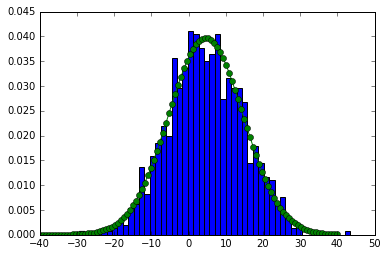

In [6]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

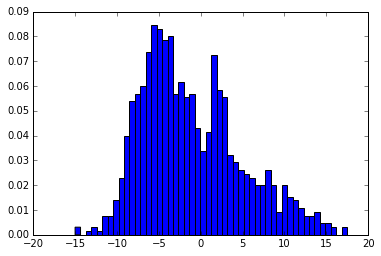

In [11]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [21]:
a = RTBM(1,2)
#a.random_init()

In [22]:
minim = minimizer.CMA(multi_thread=True)

CMA on 4 cpu(s) enabled


In [23]:
solution = minim.train(a, data, initial_solution=a.get_params())

../rtbm.py:173: RuntimeWarning: overflow encountered in exp
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:173: RuntimeWarning: overflow encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:173: RuntimeWarning: invalid value encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 8 (seed=850828, Wed Oct 11 18:36:03 2017)


../rtbm.py:173: RuntimeWarning: overflow encountered in exp
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:173: RuntimeWarning: overflow encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:173: RuntimeWarning: invalid value encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)


Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 2.159144019812492e+04 1.0e+00 8.70e-01  8e-01  9e-01 0:00.8


../rtbm.py:173: RuntimeWarning: overflow encountered in exp
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:173: RuntimeWarning: invalid value encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:173: RuntimeWarning: overflow encountered in exp
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:173: RuntimeWarning: overflow encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:173: RuntimeWarning: invalid value encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)
../rtbm.py:173: RuntimeWarning: overflow encountered in multiply
  R1 = RiemannTheta((vT.dot(w) + BhT) / (2.0j * np.pi), -q / (2.0j * np.pi), prec=RTBM_precision)


    2     20 1.478987122685836e+04 1.3e+00 9.35e-01  9e-01  1e+00 0:01.7
WARNING (module=cma.utilities.utils, iteration=3):  flat fitness (sigma=9.74e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
    3     30 inf 1.5e+00 9.74e-01  9e-01  1e+00 0:02.0


/usr/lib/sagemath/local/lib/python2.7/site-packages/cma/evolution_strategy.py:3195: RuntimeWarning: invalid value encountered in double_scalars
  es.fit.fit[-1] - es.fit.fit[0] < opts['tolfun'] and


WARNING (module=cma.utilities.utils, iteration=3):  flat fitness (sigma=9.74e-01).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately.
   25    250 7.399891115191802e+03 2.9e+00 9.72e-01  7e-01  1e+00 0:05.1
   61    610 3.576202759792881e+03 4.1e+00 1.78e-01  7e-02  2e-01 0:09.2
  100   1000 3.210926434467888e+03 2.4e+01 8.65e-02  1e-02  1e-01 0:13.7
  148   1480 3.202312339108123e+03 9.2e+01 1.68e-02  4e-04  3e-02 0:19.8
  200   2000 3.201547539137124e+03 6.4e+02 1.16e-01  1e-03  3e-01 0:26.5
  271   2710 3.151958745199564e+03 4.2e+02 1.94e-01  2e-03  2e-01 0:34.6
  300   3000 3.149731519191555e+03 7.5e+02 1.61e-01  1e-03  2e-01 0:38.1
  384   3840 3.149464081351869e+03 1.1e+03 1.92e-02  5e-05  1e-02 0:48.2
  400   4000 3.149463967597640e+03 1.0e+03 5.81e-03  1e-05  3e-03 0:50.3
  496   4960 3.149463961770979e+03 1.1e+03 4.04e-06  2e-09  5e-07 1:02.3
  500   500

## Testing output

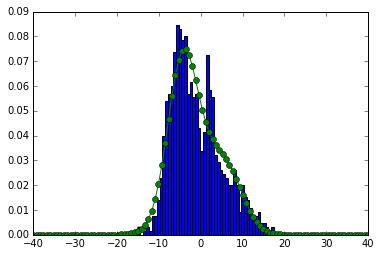

In [24]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')